# Ames Housing Data and Kaggle Challange

## Part 2

### Importing libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import scipy.stats as stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

### Loading and reading the data

In [3]:
train = pd.read_csv('data/train_clean.csv')

In [4]:
test= pd.read_csv('data/test_clean.csv')

In [5]:
test.shape

(878, 76)

In [6]:
train.shape

(2051, 77)

In [7]:
test.head()

Unnamed: 0    id        pid  ms_subclass ms_zoning  lot_frontage  lot_area  \
0           0  2658  902301120          190        RM     69.000000      9142   
1           1  2718  905108090           90        RL     69.545961      9662   
2           2  2414  528218130           60        RL     58.000000     17104   
3           3  1989  902207150           30        RM     60.000000      8520   
4           4   625  535105100           20        RL     69.545961      9500   

  street lot_shape land_contour  ... wood_deck_sf open_porch_sf  \
0   Pave       Reg          Lvl  ...            0            60   
1   Pave       IR1          Lvl  ...          170             0   
2   Pave       IR1          Lvl  ...          100            24   
3   Pave       Reg          Lvl  ...            0             0   
4   Pave       IR1          Lvl  ...            0            76   

  enclosed_porch 3ssn_porch screen_porch pool_area misc_val mo_sold  yr_sold  \
0            112          0            0         0        0       4     2006   
1              0          0            0         0        0       8     2006   
2              0          0            0         0        0       9     2006   
3            184          0            0         0        0       7     2007   
4              0          0          185         0        0       7     2009   

   sale_type  
0        WD   
1        WD   
2        New  
3        WD   
4        WD   

[5 rows x 76 columns]

In [8]:
train.head()

Unnamed: 0   id        pid  ms_subclass ms_zoning  lot_frontage  lot_area  \
0           0  109  533352170           60        RL       69.0552     13517   
1           1  544  531379050           60        RL       43.0000     11492   
2           2  153  535304180           20        RL       68.0000      7922   
3           3  318  916386060           60        RL       73.0000      9802   
4           4  255  906425045           50        RL       82.0000     14235   

  street lot_shape land_contour  ... open_porch_sf enclosed_porch 3ssn_porch  \
0   Pave       IR1          Lvl  ...            44              0          0   
1   Pave       IR1          Lvl  ...            74              0          0   
2   Pave       Reg          Lvl  ...            52              0          0   
3   Pave       Reg          Lvl  ...             0              0          0   
4   Pave       IR1          Lvl  ...            59              0          0   

  screen_porch pool_area misc_val mo_sold yr_sold  sale_type  saleprice  
0            0         0        0       3    2010        WD      130500  
1            0         0        0       4    2009        WD      220000  
2            0         0        0       1    2010        WD      109000  
3            0         0        0       4    2010        WD      174000  
4            0         0        0       3    2010        WD      138500  

[5 rows x 77 columns]

In [9]:
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [10]:
test.drop(test.columns[test.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

## Exploratory Data Analysis

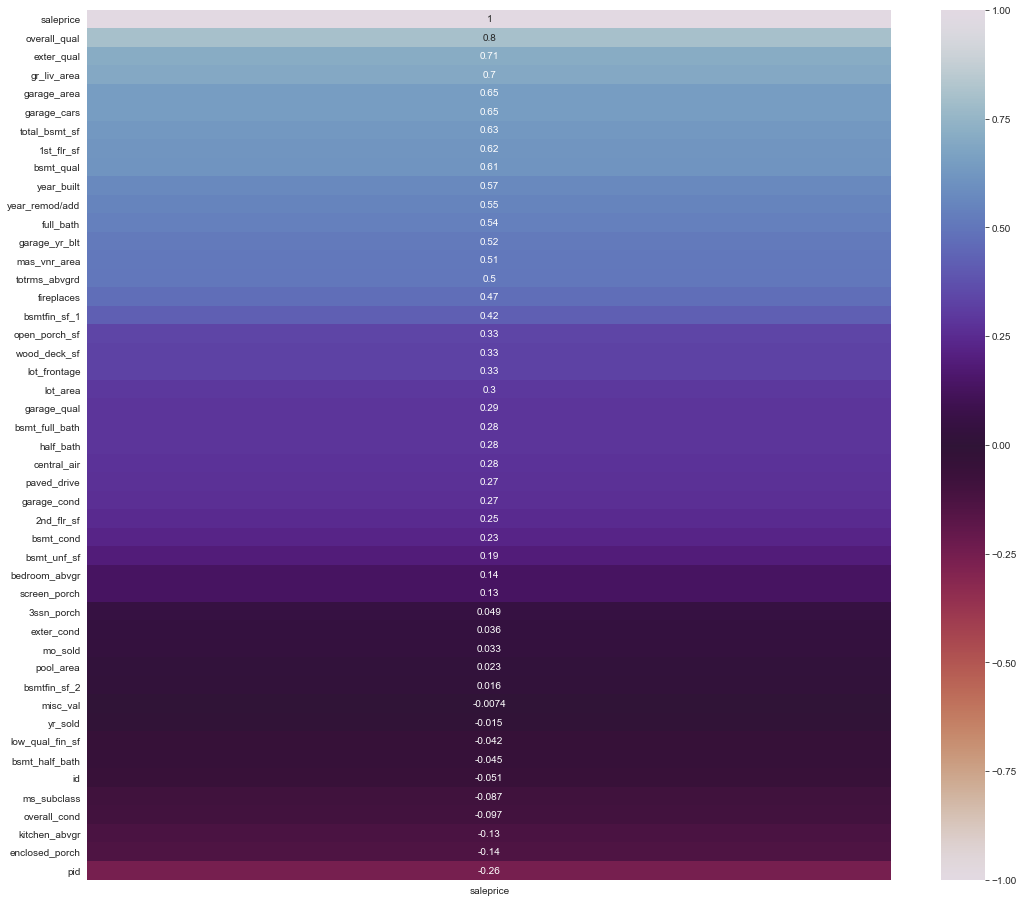

In [12]:
plt.figure(figsize=(18,16 ))
sns.heatmap(train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True, vmin=-1, vmax=1, cmap='twilight_r');


In [11]:
# Looking at features and saleprice correlations. 
train.corr()[['saleprice']]

saleprice
id               -0.051398
pid              -0.255052
ms_subclass      -0.087335
lot_frontage      0.325850
lot_area          0.296566
overall_qual      0.800207
overall_cond     -0.097019
year_built        0.571849
year_remod/add    0.550370
mas_vnr_area      0.508602
exter_qual        0.712146
exter_cond        0.036418
bsmt_qual         0.612188
bsmt_cond         0.225075
bsmtfin_sf_1      0.423346
bsmtfin_sf_2      0.016249
bsmt_unf_sf       0.190132
total_bsmt_sf     0.628668
central_air       0.277378
1st_flr_sf        0.618486
2nd_flr_sf        0.248452
low_qual_fin_sf  -0.041594
gr_liv_area       0.697038
bsmt_full_bath    0.283429
bsmt_half_bath   -0.045290
full_bath         0.537969
half_bath         0.283001
bedroom_abvgr     0.137067
kitchen_abvgr    -0.125444
totrms_abvgrd     0.504014
fireplaces        0.471093
garage_yr_blt     0.516738
garage_cars       0.648197
garage_area       0.650246
garage_qual       0.285281
garage_cond       0.265021
paved_drive       0.273613
wood_deck_sf      0.326490
open_porch_sf     0.333476
enclosed_porch   -0.135656
3ssn_porch        0.048732
screen_porch      0.134581
pool_area         0.023106
misc_val         -0.007375
mo_sold           0.032735
yr_sold          -0.015203
saleprice         1.000000

### Creating new variables by combining variables that are linear.

In [13]:
# New Variable - Total Porch Sq Ft
train['total_porch_sf'] = train['wood_deck_sf'] + train['open_porch_sf'] + train['3ssn_porch'] + train['enclosed_porch'] + train['screen_porch']

In [14]:
# New Variable - Total number of bathrooms
train['total_baths'] = train['bsmt_half_bath'] * 0.5 + train['bsmt_full_bath'] + train['half_bath'] * 0.5 + train['full_bath']

In [15]:
train.drop(columns=['wood_deck_sf', 'open_porch_sf', '3ssn_porch', 'enclosed_porch', 'screen_porch'], inplace=True)

In [16]:
train.drop(columns=['bsmt_half_bath', 'bsmt_full_bath', 'half_bath', 'full_bath'], inplace = True)

In [17]:
# Same steps for test dataframe
test['total_porch_sf'] =test['wood_deck_sf'] + test['open_porch_sf'] + test['3ssn_porch'] + test['enclosed_porch'] + test['screen_porch']

In [18]:
test['total_baths'] = test['bsmt_half_bath'] * 0.5 + test['bsmt_full_bath'] + test['half_bath'] * 0.5 + test['full_bath']

In [19]:
test.drop(columns=['wood_deck_sf', 'open_porch_sf', '3ssn_porch', 'enclosed_porch', 'screen_porch'], inplace = True)

In [20]:
test.drop(columns=['bsmt_half_bath', 'bsmt_full_bath', 'half_bath', 'full_bath'], inplace = True)

## Binary Features 
Some of the features have a more binary influence on the house sale price so I'm adding new variables to indiciate if the feature is part of the of hosue or not rather than looking at the features' sq ft area. 

In [21]:
# Code refrence from pbpython.com:   https://pbpython.com/categorical-encoding.html

variables = []
binary_va = {
    "has_bsmt":"total_bsmt_sf", "has_fireplace":"fireplaces", 
    "has_garage":"garage_area",  "has_pool":"pool_area", 
    "has_porch":"total_porch_sf", "has_2nd_flr":"2nd_flr_sf"
}
# Factorize numeric columns.
for cols, column in binary_va.items():
    train[cols]=train[column].apply(lambda x: 1 if x > 0 else 0)
binary_va = list(binary_va.keys())

variables.extend(binary_va)

In [22]:
variables = []
binary_va = {
    "has_bsmt":"total_bsmt_sf", "has_fireplace":"fireplaces", 
    "has_garage":"garage_area",  "has_pool":"pool_area", 
    "has_porch":"total_porch_sf", "has_2nd_flr":"2nd_flr_sf"
}
# Factorize numeric columns.
for cols, column in binary_va.items():
    test[cols]=test[column].apply(lambda x: 1 if x > 0 else 0)
binary_va = list(binary_va.keys())

variables.extend(binary_va)

C:\Users\domin_lxdhy\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


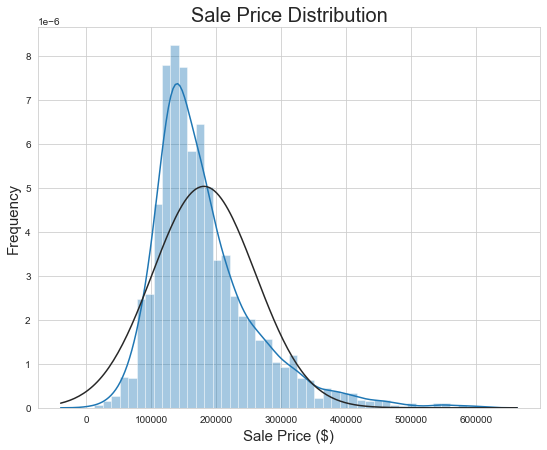

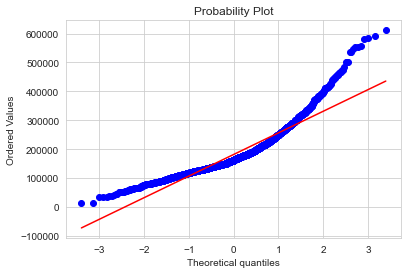

In [23]:
# To look at the target variable, Sale Price, I used distplot along with the probablity plot.

plt.figure(figsize=(9,7))
sns.distplot(train.saleprice, fit=norm);
plt.ylabel("Frequency", size=15)
plt.title('Sale Price Distribution', size=20);
plt.xlabel("Sale Price ($)", size=15)

# Get fitted parameters
(mu, sigma) = norm.fit(train['saleprice']);
fig = plt.figure()
res = stats.probplot(train['saleprice'], plot=plt)
plt.show()

In [24]:
print("Skew is:", train.saleprice.skew())

Skew is: 1.5575514385863427


Sale price distribution is positively skewed and tails to the right as the the price increases.  

I also wanted to look at the log sale price distribution for a more normal distribution. 

(array([  2.,   0.,   0.,   0.,   0.,   6.,   2.,  11.,  21.,  60., 111.,
        329., 428., 407., 275., 187., 120.,  57.,  25.,  10.]),
 array([ 9.45634071,  9.64972002,  9.84309933, 10.03647864, 10.22985795,
        10.42323727, 10.61661658, 10.80999589, 11.0033752 , 11.19675451,
        11.39013383, 11.58351314, 11.77689245, 11.97027176, 12.16365107,
        12.35703039, 12.5504097 , 12.74378901, 12.93716832, 13.13054763,
        13.32392695]),
 <BarContainer object of 20 artists>)

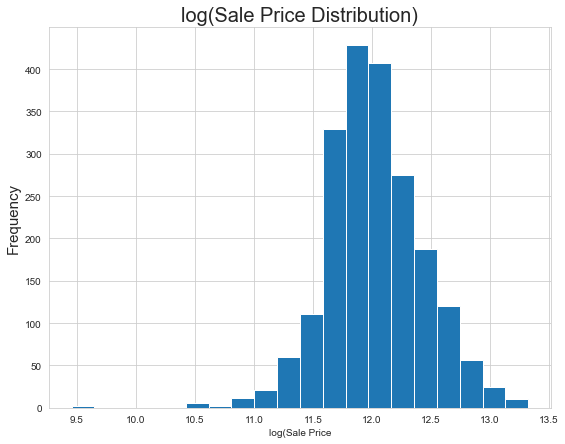

In [25]:
plt.figure(figsize=(9,7))
sns.histplot(np.log(train.saleprice), bins=20)
plt.ylabel("Frequency", size=15)
plt.title('log(Sale Price Distribution)', size=20);
plt.xlabel("log(Sale Price")
plt.hist(np.log(train.saleprice), bins=20)

The logged sale price distribution has become more normal. 

Text(0.5, 1.0, 'Ground Living Area vs. Sale Price')

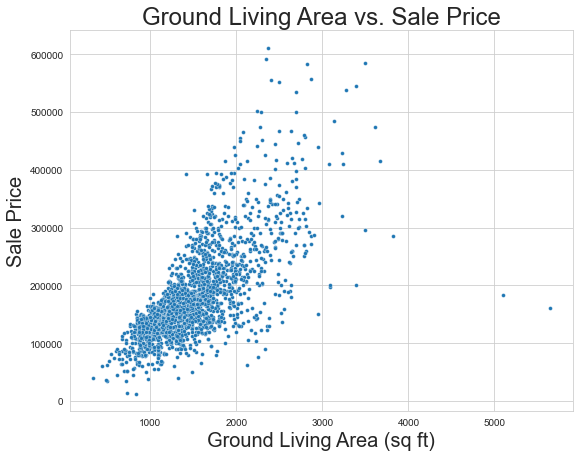

In [26]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='gr_liv_area', y='saleprice', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Ground Living Area vs. Sale Price", size=24)

Naturally there is a strong corralation with a positive relationship between ground living area and the sale price. There's a couple of outliers which are houses with a larger square footage that may have an negative impact on the predictive model . 

In [27]:
train['gr_liv_area'].mean()

1499.330082886397

In [28]:
train['gr_liv_area'].median()

1444.0

In [29]:
gr_liv_area = train['gr_liv_area']
max_value = gr_liv_area.max()
print(max_value)

5642


In [30]:
# Identifying outliers in gr_liv_area and sale price
print(train['gr_liv_area'].quantile(0.50))
print(train['gr_liv_area'].quantile(0.95))
print(train['saleprice'].quantile(0.50))
print(train['saleprice'].quantile(0.95))

1444.0
2473.0
162500.0
335000.0


In [31]:
# Replacing the outliers in gr_liv_area and saleprice with the median in train

train['gr_liv_area'] = np.where(train['gr_liv_area'] > 3000, 1000, train['gr_liv_area'])
train['saleprice'] = np.where(train['saleprice'] > 400000, 100000, train['saleprice'])

# Code from https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

In [32]:
# Replacing the outliers in gr_liv_area with median in test. 
test['gr_liv_area'] = np.where(test['gr_liv_area'] > 3000, 1000, test['gr_liv_area'])

In [33]:
train.describe()

id           pid  ms_subclass  lot_frontage       lot_area  \
count  2051.000000  2.051000e+03  2051.000000   2051.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     21.306357    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     60.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     69.055200    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     78.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       overall_qual  overall_cond   year_built  year_remod/add  mas_vnr_area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2051.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.021770   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    159.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...      yr_sold      saleprice  total_porch_sf  total_baths  \
count  ...  2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...  2007.775719  173219.197465      183.065334     2.222047   
std    ...     1.312014   66672.208822      160.116258     0.807437   
min    ...  2006.000000   12789.000000        0.000000     1.000000   
25%    ...  2007.000000  128000.000000       49.000000     2.000000   
50%    ...  2008.000000  158500.000000      164.000000     2.000000   
75%    ...  2009.000000  207500.000000      268.000000     3.000000   
max    ...  2010.000000  398800.000000     1424.000000     7.000000   

          has_bsmt  has_fireplace   has_garage     has_pool    has_porch  \
count  2051.000000    2051.000000  2051.000000  2051.000000  2051.000000   
mean      0.973671       0.512433     0.944905     0.004388     0.832277   
std       0.160150       0.499967     0.228221     0.066113     0.373711   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       1.000000       0.000000     1.000000     0.000000     1.000000   
50%       1.000000       1.000000     1.000000     0.000000     1.000000   
75%       1.000000       1.000000     1.000000     0.000000     1.000000   
max       1.000000       1.000000     1.000000     1.000000     1.000000   

       has_2nd_flr  
count  2051.000000  
mean      0.419308  
std       0.493566  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 46 columns]

### Since the ground living area and the sale price are very strongly corraleted, I graphed the binary features as a third variables to visualize the effect with better accuracy. 

Text(0.5, 1.0, 'Basement Effect on Sale Price')

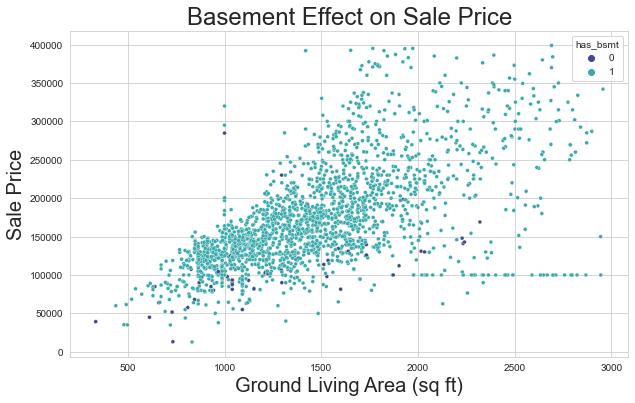

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='has_bsmt', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Basement Effect on Sale Price", size=24)

Text(0.5, 1.0, 'Fireplaces Effect on Sale Price')

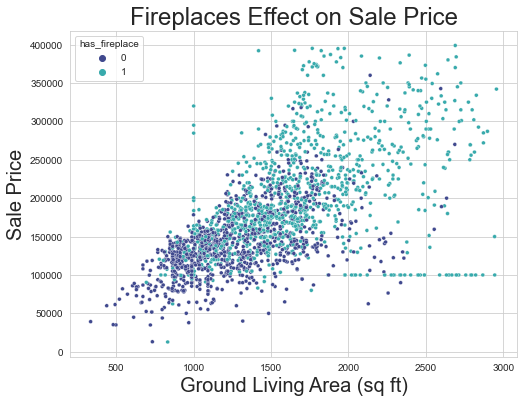

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='has_fireplace', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Fireplaces Effect on Sale Price", size=24)

Text(0.5, 1.0, 'Garage Effect on Sale Price')

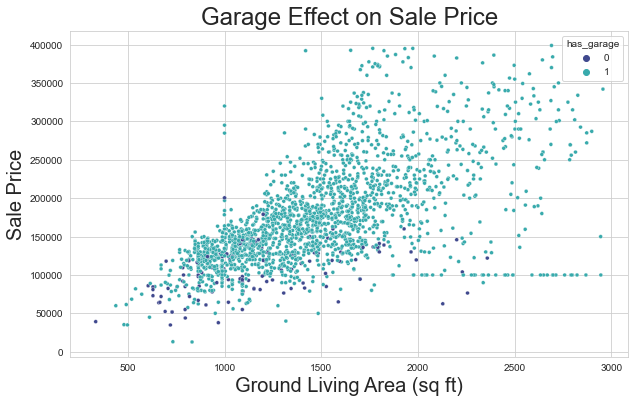

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='has_garage', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Garage Effect on Sale Price", size=24)

Text(0.5, 1.0, 'Second Floor Effect on Sale Price')

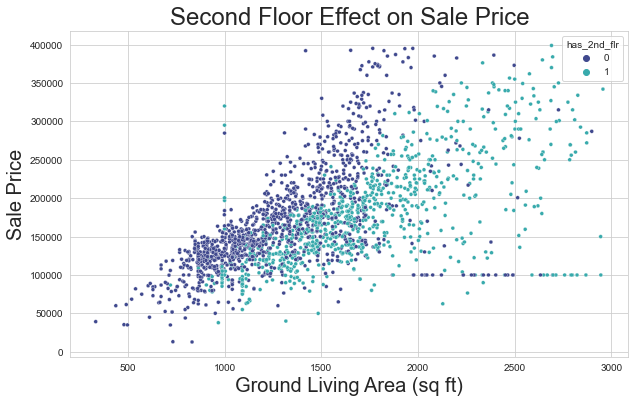

In [37]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='has_2nd_flr', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Second Floor Effect on Sale Price", size=24)

Text(0.5, 1.0, 'Pool Area Effect on Sale Price')

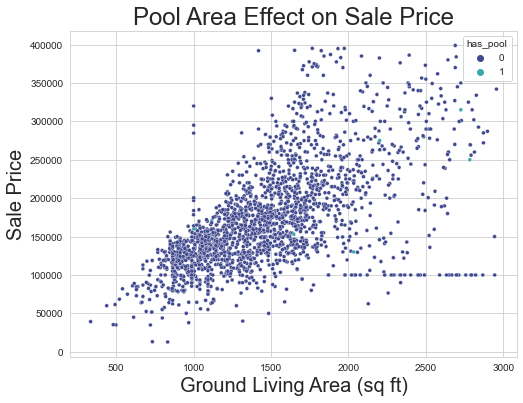

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='has_pool', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Pool Area Effect on Sale Price", size=24)

Text(0.5, 1.0, 'Porch Area Effect on Sale Price')

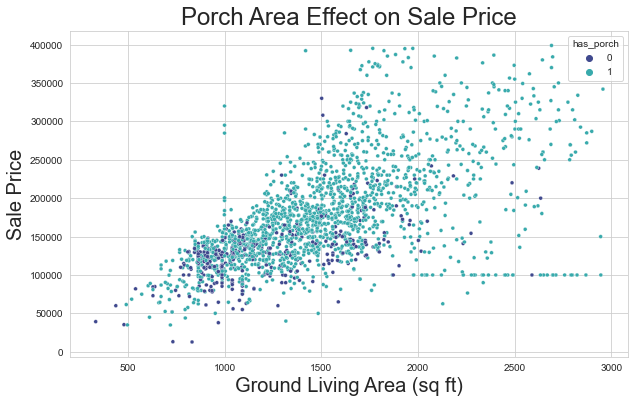

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='has_porch', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Porch Area Effect on Sale Price", size=24)

- Features like having a basement, a porch or a garage have very little influence on the sale price. This is because most of the houses in our dataframe and over all in Iowa, it's very common that these features are part of the house. 

- On the other hand we have a feature like having a pool that is also not a good predictor since a large portion of the houses do not have a pool. 

- The presence of fireplace feature does have a positive influence on the sale price. This is mostly because fireplaces give houses a more luxurious atmosphere and since fireplaces take up space, it also most likely means the house has more living space. 

- Even though having a second floor does have positive influence on the sale price, people in Iowa would rather pay a premium for a house with more living area square footage without a second floor. Multilevel houses seem to be less desirable in Ames, Iowa. 


In [40]:
# Deleting variables that have little to no effect on the sale price. 
train.drop(columns=['pool_area', 'has_pool', 'has_garage', 'fireplaces', 
                    '2nd_flr_sf', 'garage_area', 'total_porch_sf'], inplace=True)

In [41]:
# Deleting variables that have little to no effect on the sale price. 
test.drop(columns=['pool_area', 'has_pool', 'has_garage', 'fireplaces', 
                    '2nd_flr_sf', 'garage_area', 'total_porch_sf'], inplace=True)

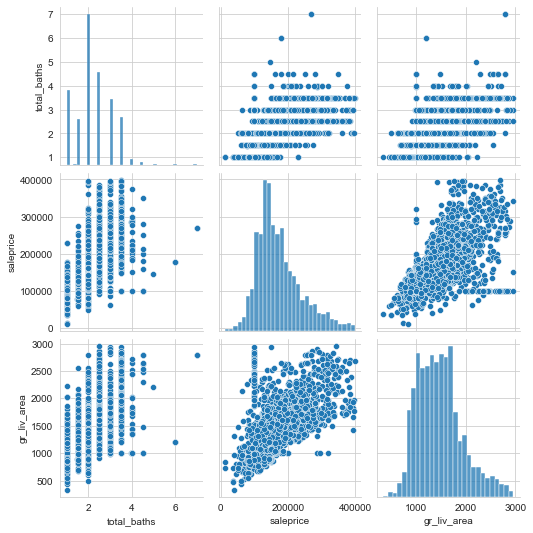

In [42]:
sns.pairplot(train[['total_baths', 'saleprice', 'gr_liv_area']]);

This pair plot graph helps us visualize the relationship with the added "Total_baths" variable with sale price. The price rises with the number of bathrooms in the house and poeple are willing to pay the premium for that feature. 

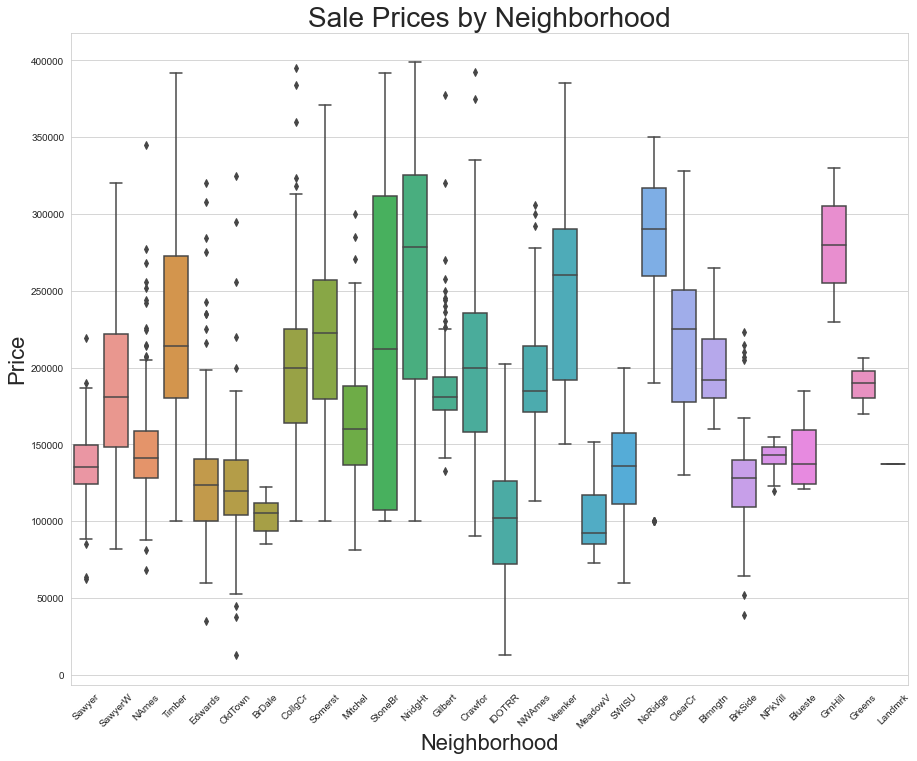

In [43]:
_, ax = plt.subplots(figsize=(15, 12))
sns.boxplot(x='neighborhood', y='saleprice', data=train, ax=ax)
ax.set_title("Sale Prices by Neighborhood", fontsize=28)
ax.set_xlabel("Neighborhood", fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Price", fontsize=22);

Since we have quite a few neighborhoods included in the dataframe, turning this variable into a dummy variable should be a more effective way to find the correlations. 

In [44]:
neighborhood = pd.get_dummies(train["neighborhood"], prefix='nabe')
train=pd.concat([train,neighborhood], axis=1)
del train['neighborhood']

In [45]:
neighborhood_2 = pd.get_dummies(test["neighborhood"], prefix='nabe')
test=pd.concat([test,neighborhood_2], axis=1)
del test['neighborhood']

In [46]:
test.shape

(878, 92)

In [47]:
train.shape

(2051, 95)

Text(0.5, 1.0, 'Sale Price vs. Street Access Type')

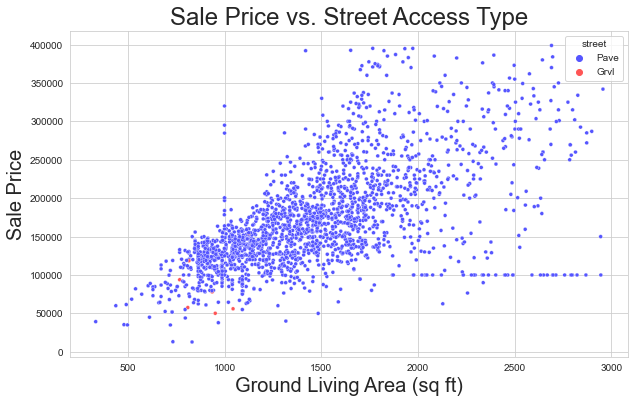

In [48]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='street', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Street Access Type", size=24)

The street variable does not provide with any additional findings as most of the houses have a paved street. Since it's not a suitable predictor it'll be removed. 

Text(0.5, 1.0, 'Sale Price vs. Building Type')

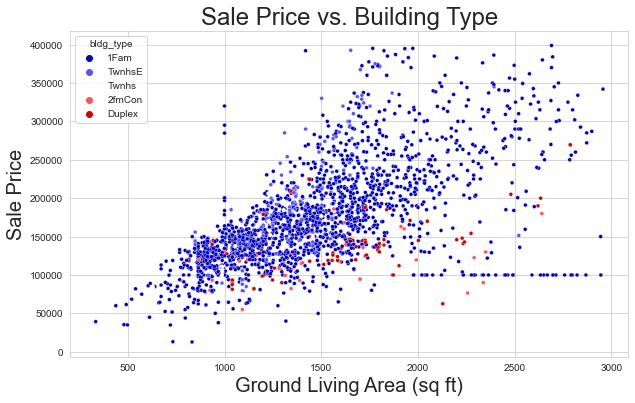

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='bldg_type', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Building Type", size=24)

The building type definetly has a positive influence on the sale price but to see a more accurate correlation, I'll make new variables by combining some of the house types that are very similar. 

In [50]:
# Building Type will include 1 townhouse type, a 2 family house, and a single family house. 
train['bldg_type'] = train['bldg_type'].apply(lambda x: 'Twnhs' if x in ('TwnhsE', 'TwnhsI') else x)
train['bldg_type'] = train['bldg_type'].apply(lambda x: '2_fam' if x in ('2fmCon', 'Duplex') else x)

In [51]:
test['bldg_type'] = test['bldg_type'].apply(lambda x: 'Twnhs' if x in ('TwnhsE', 'TwnhsI') else x)
test['bldg_type'] = test['bldg_type'].apply(lambda x: '2_fam' if x in ('2fmCon', 'Duplex') else x)

In [52]:
# Code from group work with Adam and Kovacs
train["paved_drive"] = train["paved_drive"].map({"Y":1, "N":0, "P":1})
train["central_air"] = train["central_air"].map({"Y":1, "N":0})

In [53]:
test["central_air"] = test["central_air"].map({"Y":1, "N":0})
test["paved_drive"] = test["paved_drive"].map({"Y":1, "N":0, "P":1})

Text(0.5, 1.0, 'Sale Price vs. House Build Type')

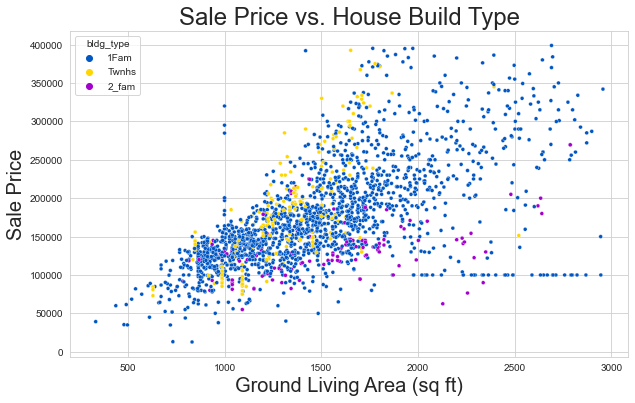

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='bldg_type', s=15, data=train, palette='prism');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. House Build Type", size=24)

Withthe new engineered features we can see in the graph a much more clear realtionship and influence on the sale price. 

In [55]:
# For our model, we will dummify the building type column. 
house_type = pd.get_dummies(train["bldg_type"], prefix='house_type')
train=pd.concat([train, house_type], axis=1)
del train['bldg_type']

In [56]:
house_type = pd.get_dummies(test["bldg_type"], prefix='house_type')
test=pd.concat([test, house_type], axis=1)
del test['bldg_type']

In [57]:
# Columns with little corralation of not sufficient data: 

train.drop(columns=['central_air', 'street', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'low_qual_fin_sf', 
                    'bedroom_abvgr', 'kitchen_abvgr', 'misc_val', 'mo_sold', 'paved_drive', 'garage_yr_blt'], inplace = True)

In [58]:
test.drop(columns=['central_air', 'street', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'low_qual_fin_sf', 
                    'bedroom_abvgr', 'kitchen_abvgr', 'misc_val', 'mo_sold', 'paved_drive', 'garage_yr_blt'], inplace = True)

In [59]:
train.shape

(2051, 86)

Text(0.5, 1.0, 'Sale Price vs. House Exterior Type')

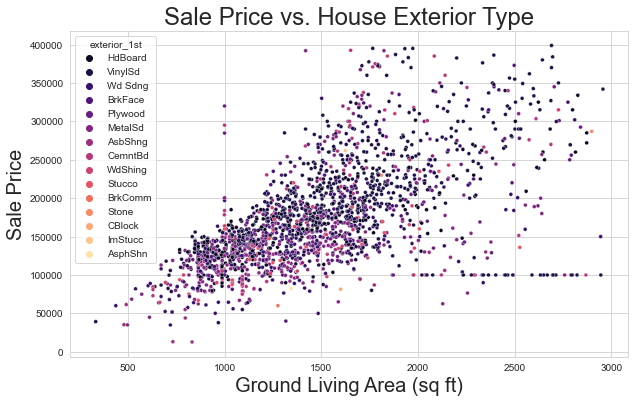

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='exterior_1st', s=15, data=train, palette='magma');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. House Exterior Type", size=24)

Text(0.5, 1.0, 'Sale Price vs. 2nd House Exterior Type ')

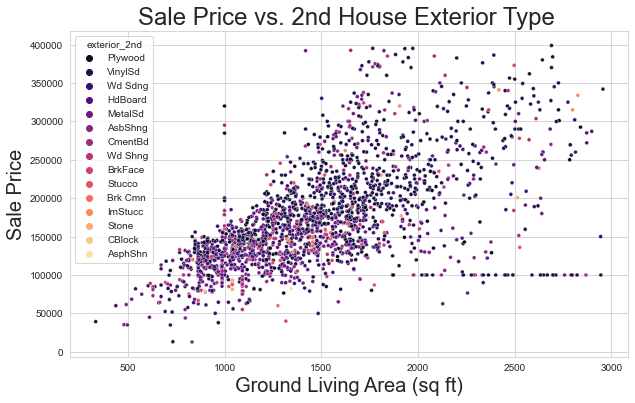

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='exterior_2nd', s=15, data=train, palette='magma');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. 2nd House Exterior Type ", size=24)

In [62]:
# Too many exterior values to make a good prediction. Deleting exterior features and associated ordinal features.
train.drop(columns=['exterior_1st', 'exterior_2nd', 'exter_cond', 'exter_qual'], inplace = True)

In [63]:
test.drop(columns=['exterior_1st', 'exterior_2nd', 'exter_cond', 'exter_qual'], inplace = True)

Text(0.5, 1.0, 'Sale Price vs. Foundation Type')

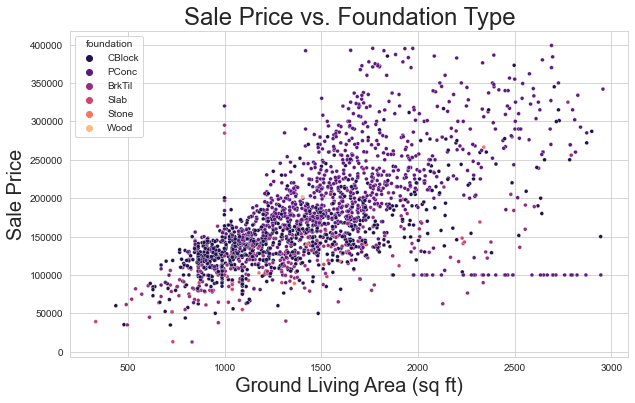

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='foundation', s=15, data=train, palette='magma');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Foundation Type", size=24)

The type of foundation in the house does influence its sale price, however only 3 of the types provide enough data to be used as a predictor. My tactic is to keep the three types, slab, stone, and wood and dummifying them

In [65]:
train['foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64

In [66]:
foundation_type = pd.get_dummies(train["foundation"], prefix='fnd')
# Keeping only the top 3 fnds. 
del foundation_type['fnd_Slab']
del foundation_type['fnd_Stone']
del foundation_type['fnd_Wood']
train=pd.concat([train, foundation_type], axis=1)
del train['foundation']

In [67]:
foundation_type = pd.get_dummies(test["foundation"], prefix='fnd')
# Keeping only the top 3 fnds. 
del foundation_type['fnd_Slab']
del foundation_type['fnd_Stone']
del foundation_type['fnd_Wood']
test=pd.concat([test, foundation_type], axis=1)
del test['foundation']

Text(0.5, 1.0, 'Sale Price vs. Heating')

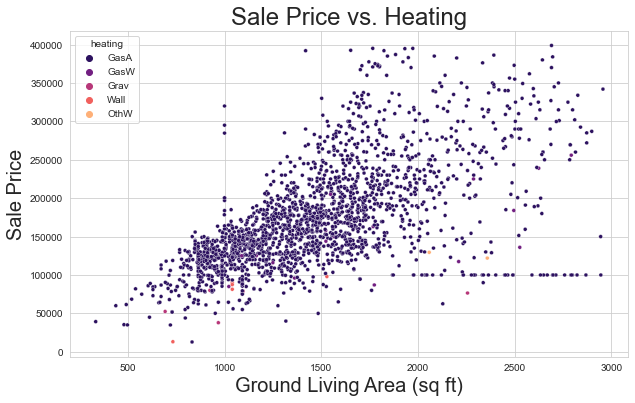

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='heating', s=15, data=train, palette='magma');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Heating", size=24)

In [69]:
# Heating is another feature that does not provide any reliable evidence since most of the houses have GasA heating.
del train['heating']
del test['heating']

Text(0.5, 1.0, 'Sale Price vs. Electrycal System')

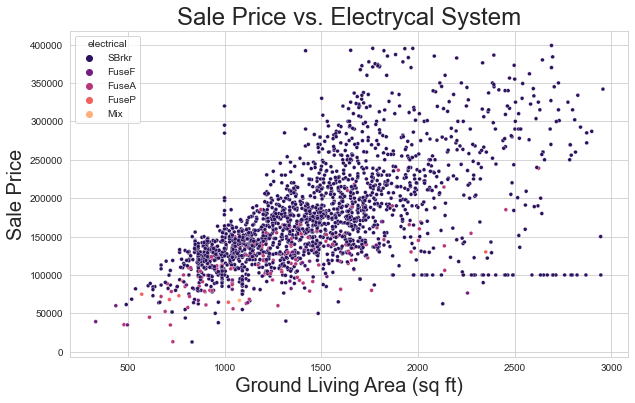

In [70]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='electrical', s=15, data=train, palette='magma');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Electrycal System", size=24)

In [71]:
#Doing the same thing to electrical feature. 
del train['electrical']
del test['electrical']

Text(0.5, 1.0, 'Sale Price vs. Garage Type')

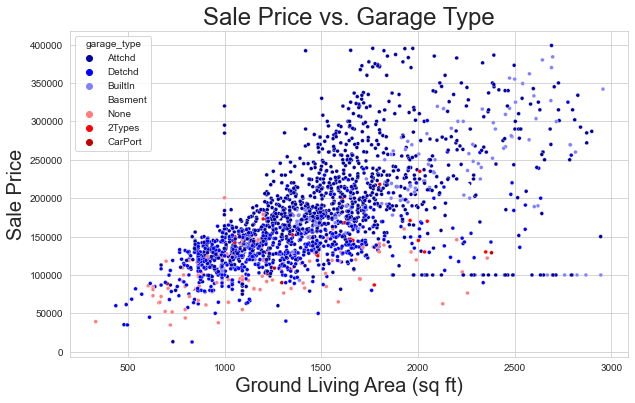

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='garage_type', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Garage Type", size=24)

Text(0.5, 1.0, 'Sale Price vs. House Dwelling Style')

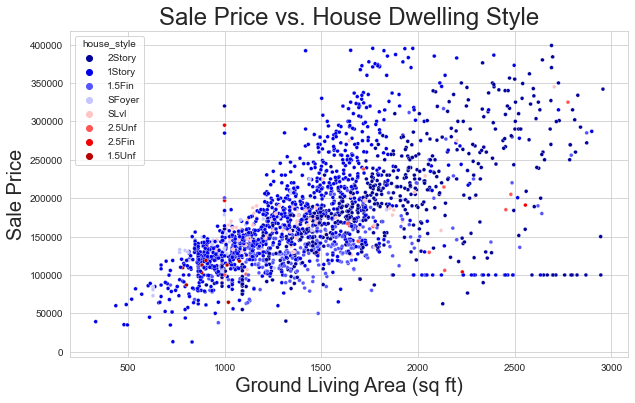

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='house_style', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. House Dwelling Style", size=24)

In [74]:
# Since we already have a "has_2nd_flr and "has_garage" variables, house dwelling and garage type are unnecceary variables.  
train.drop(columns=['garage_type', 'house_style'], inplace = True)
test.drop(columns=['garage_type', 'house_style'], inplace = True)

Text(0.5, 1.0, 'Sale Price vs. Property Flatness')

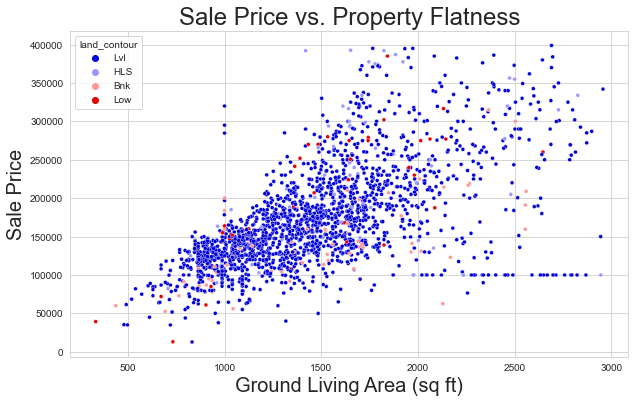

In [75]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='land_contour', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Property Flatness", size=24)

In [76]:
del train['land_contour']
del test['land_contour']

Text(0.5, 1.0, 'Sale Price vs. Lot Configuration')

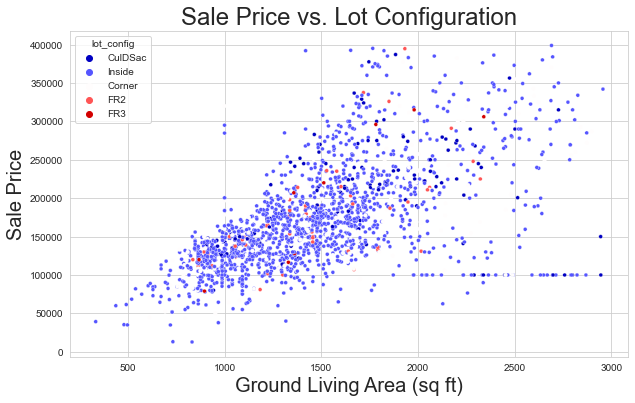

In [77]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='lot_config', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Lot Configuration", size=24)

In [78]:
del train['lot_config']
del test['lot_config']

Text(0.5, 1.0, 'Sale Price vs. Zone Class')

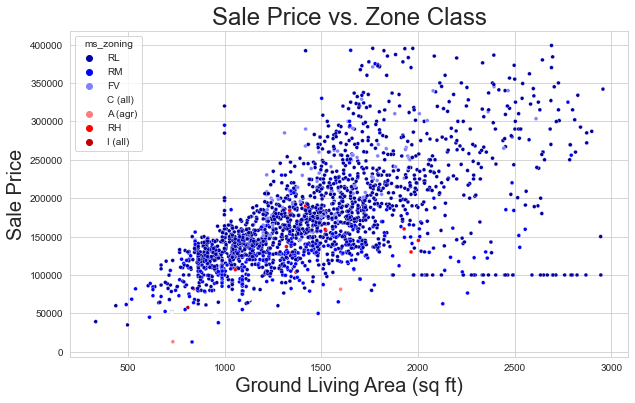

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='ms_zoning', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Zone Class", size=24)

In [80]:
train['ms_zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64

In [81]:
# The data does not provide an even distribution of zoning classification type so it will not help our model. 
del train['ms_zoning']
del test['ms_zoning']

Text(0.5, 1.0, 'Sale Price vs. Masonary Veneer')

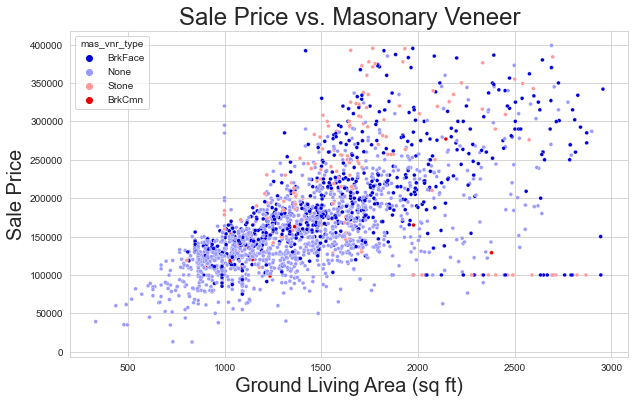

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='mas_vnr_type', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Masonary Veneer", size=24)

In [83]:
train['mas_vnr_type'].value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [84]:
del train['mas_vnr_type']
del test['mas_vnr_type']

Text(0.5, 1.0, 'Sale Price vs. Roof Style')

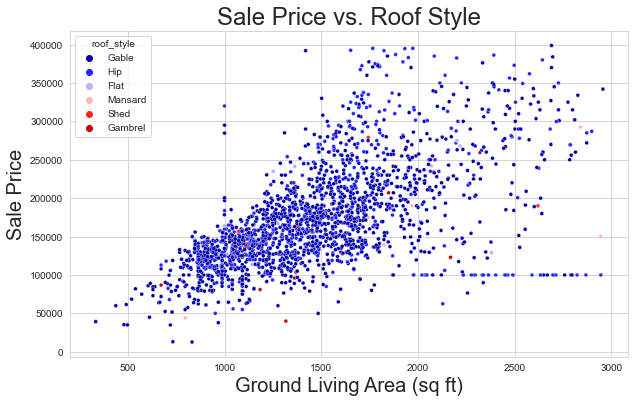

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='roof_style', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Roof Style", size=24)

In [86]:
del train['roof_style']
del test['roof_style']

Text(0.5, 1.0, 'Sale Price vs. Roof Material')

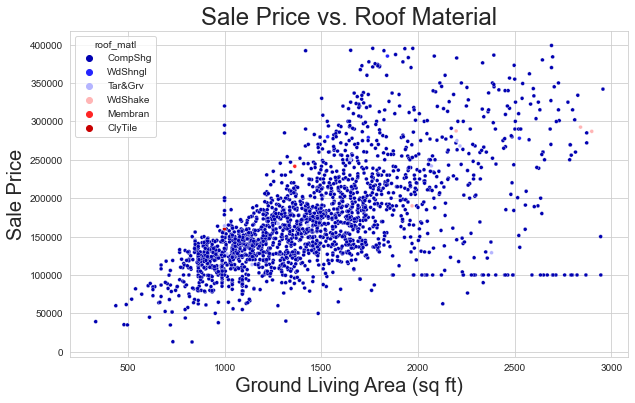

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='roof_matl', s=15, data=train, palette='seismic');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Roof Material", size=24)


In [88]:
del train['roof_matl']
del test['roof_matl']

In [89]:
train['sale_type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: sale_type, dtype: int64

In [90]:
# Transforming sale_type variable into a binary variable to indicate if the house is new or not. 

train['sale_new_house'] = train['sale_type'].apply(lambda x: 1 if x == 'New' else 0)
del train['sale_type']

In [91]:
test['sale_new_house'] = test['sale_type'].apply(lambda x: 1 if x == 'New' else 0)
del test['sale_type']

Text(0.5, 1.0, 'Built/Sold New and Sale Price ')

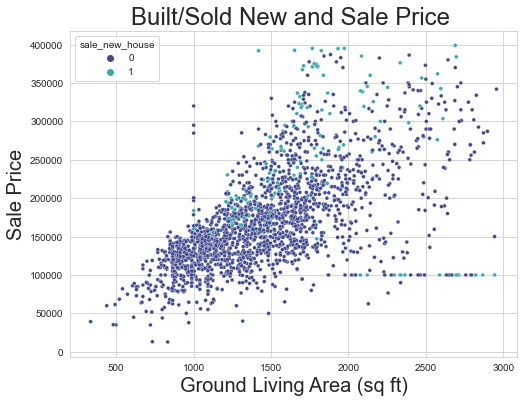

In [93]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='sale_new_house', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Built/Sold New and Sale Price ", size=24)

## Age and Remodeling

The age of the house plays a major role on the price and buyers willing to pay the priemium for a newer construction. 
Since year sold does not have a high corr. with the sale price, I'll add a new variable that contains the age of the house and another one that tells us if a house was recently remodeled before the selling date. 

In [94]:
years = (train['year_remod/add'] < train['year_built'])
assert years.sum() == 1
train.loc[years, 'year_remod/add'] = train.loc[years, 'year_built']

In [95]:
remod_add = (train['year_remod/add'] < train['year_built'])
train['remod_add'] = 0
train.loc[remod_add, 'remod_add'] = 1
round(100 * remod_add.sum() / train.shape[0])


0.0

In [96]:

train['house_age'] = train['yr_sold'] - train['year_built']
train['remod_age'] = train['yr_sold'] - train['year_remod/add']

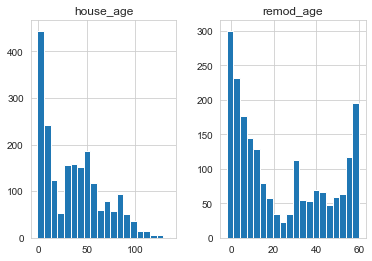

In [97]:
train[['house_age', 'remod_age']].hist(bins=20);

In [98]:
train['new_house'] = train['house_age'].apply(lambda x: 1 if x <= 10 else 0)
train['new_remod'] = train['remod_age'].apply(lambda x: 1 if x <= 10 else 0)

Text(0.5, 1.0, 'House Construction Age and Sale Price')

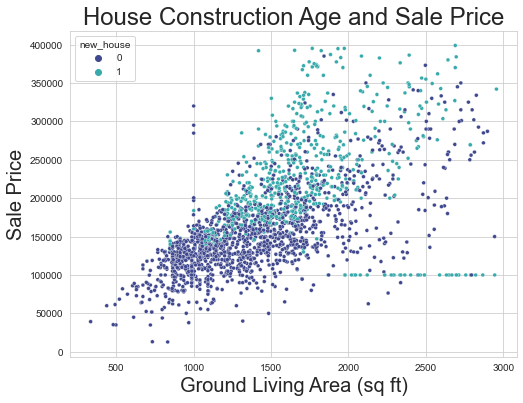

In [99]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='new_house', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("House Construction Age and Sale Price", size=24)

Text(0.5, 1.0, 'Sale Price vs. Newly Remodeled')

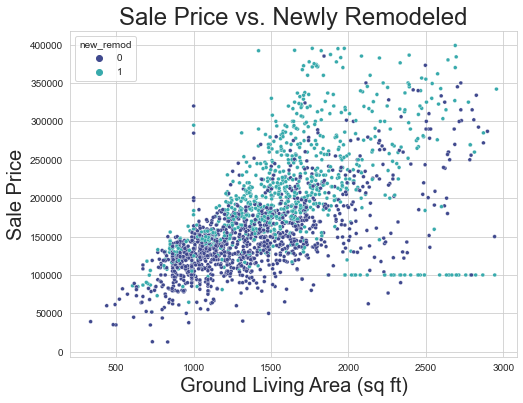

In [100]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='gr_liv_area', y='saleprice', hue='new_remod', s=15, data=train, palette='mako');
plt.xlabel("Ground Living Area (sq ft)", size=20)
plt.ylabel("Sale Price", size=20)
plt.title("Sale Price vs. Newly Remodeled", size=24)

In [101]:
train.drop(columns=['year_remod/add', 'yr_sold', 'year_built', 'sale_new_house', 'remod_add'], inplace = True)

In [102]:
remod_add = (test['year_remod/add'] < test['year_built'])
test['remod_add'] = 0
test.loc[remod_add, 'remod_add'] = 1
round(100 * remod_add.sum() / test.shape[0])

0.0

In [103]:
test['house_age'] = test['yr_sold'] - test['year_built']
test['remod_age'] = test['yr_sold'] - test['year_remod/add']

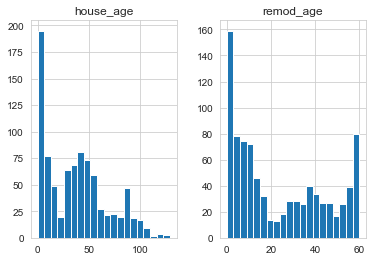

In [104]:
test[['house_age', 'remod_age']].hist(bins=20);

In [105]:
test['new_house'] = test['house_age'].apply(lambda x: 1 if x <= 10 else 0)
test['new_remod'] = test['remod_age'].apply(lambda x: 1 if x <= 10 else 0)

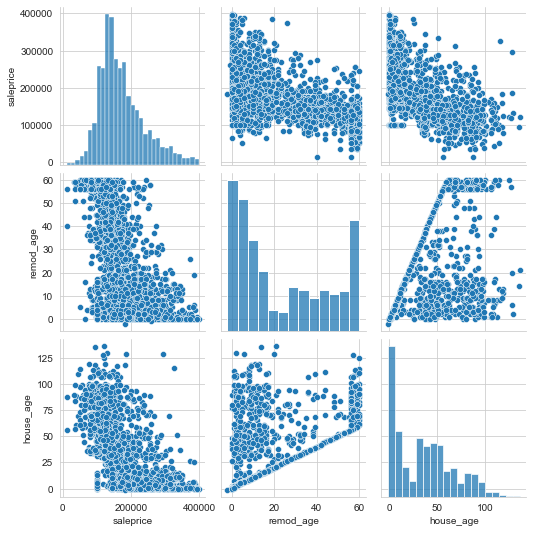

In [106]:
# Pairplot will give us a more detailed visual on the relationship between saleprice,the age of the house, and if it was remodeled. 

sns.pairplot(train[['saleprice', 'remod_age', 'house_age']]);

In [107]:
test.drop(columns=['year_remod/add', 'yr_sold', 'year_built'], inplace = True)

In [108]:
test.drop(columns=['lot_shape', 'utilities', 'land_slope', 'condition_1', 'condition_2', 'bsmt_exposure', 
                   'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc','functional', 'garage_finish',
                   'pid', 'ms_subclass', 'bsmt_cond', '1st_flr_sf', 'bsmtfin_sf_1', 'overall_cond'
                  
                  ], inplace = True)

In [109]:
train.drop(columns=['lot_shape', 'utilities', 'land_slope', 'condition_1', 'condition_2', 'bsmt_exposure', 
                   'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'kitchen_qual', 'functional', 'garage_finish', 
                    'pid' , 'ms_subclass', 'bsmt_cond', '1st_flr_sf', 'bsmtfin_sf_1','overall_cond'
                   ], inplace = True)

In [110]:
train.corr()[['saleprice']]

saleprice
id                -0.035397
lot_frontage       0.267007
lot_area           0.218423
overall_qual       0.693270
mas_vnr_area       0.304485
bsmt_qual          0.548312
total_bsmt_sf      0.487195
gr_liv_area        0.606911
totrms_abvgrd      0.372341
garage_cars        0.578399
garage_qual        0.288925
garage_cond        0.282260
saleprice          1.000000
total_baths        0.563127
has_bsmt           0.163738
has_fireplace      0.456842
has_porch          0.279572
has_2nd_flr        0.074142
nabe_Blmngtn       0.042489
nabe_Blueste      -0.023284
nabe_BrDale       -0.101328
nabe_BrkSide      -0.135954
nabe_ClearCr       0.076711
nabe_CollgCr       0.126545
nabe_Crawfor       0.092847
nabe_Edwards      -0.184528
nabe_Gilbert       0.058806
nabe_Greens        0.008870
nabe_GrnHill       0.050049
nabe_IDOTRR       -0.201867
nabe_Landmrk      -0.012001
nabe_MeadowV      -0.119149
nabe_Mitchel      -0.017030
nabe_NAmes        -0.172909
nabe_NPkVill      -0.044908
nabe_NWAmes        0.067571
nabe_NoRidge       0.215869
nabe_NridgHt       0.305115
nabe_OldTown      -0.221480
nabe_SWISU        -0.072641
nabe_Sawyer       -0.129322
nabe_SawyerW       0.045914
nabe_Somerst       0.199562
nabe_StoneBr       0.102198
nabe_Timber        0.126811
nabe_Veenker       0.110206
house_type_1Fam    0.069417
house_type_2_fam  -0.150444
house_type_Twnhs   0.029482
fnd_BrkTil        -0.246554
fnd_CBlock        -0.321750
fnd_PConc          0.507189
house_age         -0.561132
remod_age         -0.535237
new_house          0.492601
new_remod          0.431696

In [111]:
# Looping through the columns in the train and test to have an even number of columns. 
# Code credit to Kovacs
to_drop = []
for col in train.columns:
    if col not in test.columns:
        to_drop.append(col)

In [112]:
to_drop.pop(0)
train.drop(columns = to_drop, inplace = True)

In [113]:
train.shape

(2051, 54)

In [114]:
test.shape

(878, 56)

In [365]:
#Saving the model ready dataframes
test.to_csv('test_model_final.csv')

In [366]:
train.to_csv('train_model_final.csv')